Using CPU. Note: This module is much faster with a GPU.


Loading EasyOCR...
📍 Current Working Directory: d:\Desktop\insurance-claim-checker\backend\notebooks
✅ Found images in: d:\Desktop\insurance-claim-checker\data\bills
📸 Testing on: d:\Desktop\insurance-claim-checker\data\bills\Fraud.jpeg
Reading text... (This might take a few seconds)


c:\Users\Apurva\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Found 115 text regions.

⚠️ Low Confidence: 'Reg No. DR86486' (0.47)
⚠️ Low Confidence: 'DP Road ' (0.36)
⚠️ Low Confidence: 'Tmg;' (0.18)
⚠️ Low Confidence: 'Hame: DUrNI' (0.05)
⚠️ Low Confidence: 'OOO01' (0.21)
⚠️ Low Confidence: 'Parhiolar' (0.36)
⚠️ Low Confidence: 'Amauni' (0.07)
⚠️ Low Confidence: 'ho Dim' (0.08)
⚠️ Low Confidence: 'IUUU UU' (0.11)
⚠️ Low Confidence: 'sooo00' (0.06)
⚠️ Low Confidence: 'Professionl Fees' (0.48)
⚠️ Low Confidence: 'Amount Payable: 3650.00' (0.48)
⚠️ Low Confidence: 'Duntin Vrords' (0.47)
⚠️ Low Confidence: 'parmars' (0.26)
⚠️ Low Confidence: '2sumuu' (0.08)
⚠️ Low Confidence: '250,00' (0.30)
⚠️ Low Confidence: '(GENOOL)' (0.38)
⚠️ Low Confidence: 'Rebulzation' (0.35)
⚠️ Low Confidence: 'IUU-UU' (0.42)
⚠️ Low Confidence: 'IUU UU' (0.14)
⚠️ Low Confidence: '(GENO0L)' (0.41)
⚠️ Low Confidence: '1000,00' (0.41)
⚠️ Low Confidence: 'L000 00' (0.12)
⚠️ Low Confidence: 'suuuul' (0.44)
⚠️ Low Confidence: '500.00' (0.48)
⚠️ Low Confidence: 'Rule' (0.25)
⚠️ 

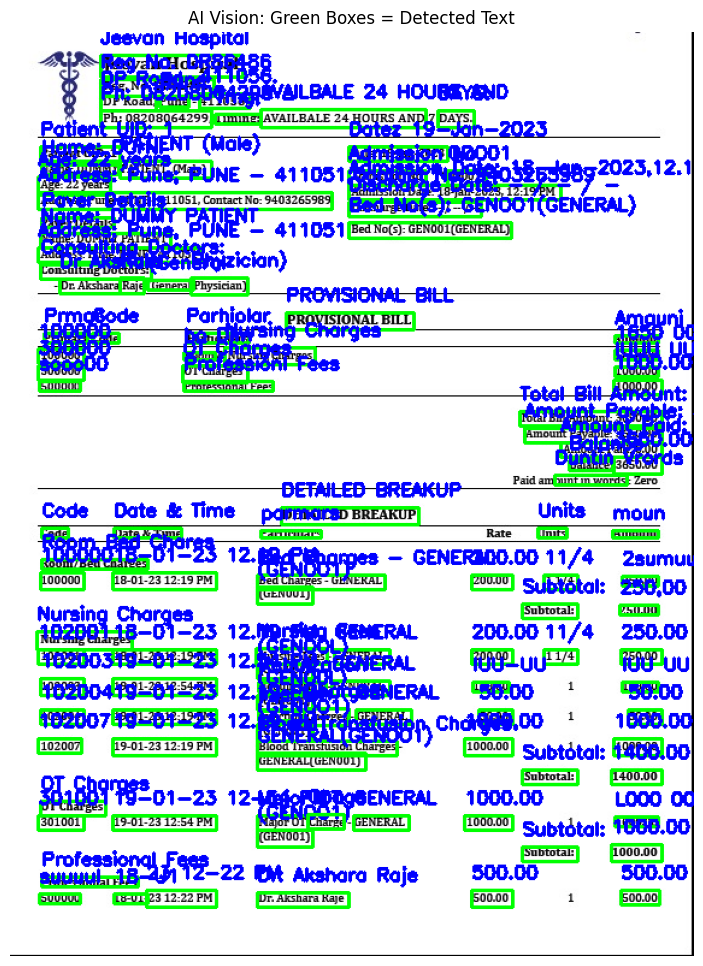


--- Full Extracted Text ---
Jeevan Hospital Reg No. DR86486 DP Road  Pune 411056. Ph: 08208064299 _ Tmg; AVAILBALE 24 HOURS AND DAYS. Patient UID: 1 Datez 19-Jan-2023 Hame: DUrNI PATIENT (Male) Admission No OOO01 Age: 22 years Admission Date: 18-Jan-2023,12.19 PM Address: Pune; PUNE - 411051,Contact No: 9403265989 Discharge Date: - / - / - Paver Details Bed No(s): GENOO1(GENERAL) Name: DUMMY PATIENT Address: Pune, PUNE - 411051 Consulting Doctors: Dr Akshara (General Phyzician) PROVISIONAL BILL Prmar Gode Parhiolar Amauni 100000 ho Dim Nursing Charges 1650 00 300000 OT Charges IUUU UU sooo00 Professionl Fees 1000.00 Total Bill Amount: 3650.00 Amount Payable: 3650.00 Amount Paid: 0.00 Balance 3650.00 Duntin Vrords DETAILED BREAKUP Code Date & Time parmars Units moun Room Bed Chares 100000 18-01-23 12.19 PM Bed Charges - GENERAL 200.00 11/4 2sumuu (GENOO1) Subtotal: 250,00 Nursing Charges 102001 18-01-23 12.19 PM Nursing Fees GENERAL 200.00 11/4 250.00 (GENOOL) 102003 19-01-23 12.54 PM 

In [2]:
# %% [markdown]
# # 👁️ OCR Extraction Demo
# This notebook visualizes how EasyOCR detects text regions in a medical bill.

# %%
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# %%
# 1. SETUP
# Initialize the OCR Reader (English)
# gpu=False ensures it runs even on standard laptops
print("Loading EasyOCR...")
reader = easyocr.Reader(['en'], gpu=False)

# %%
# 2. LOAD IMAGE
# We pick a sample image from our uploads folder.
# NOTE: Ensure you have uploaded a bill via the frontend first, 
# or place a file named 'sample.jpg' in the backend/uploads folder.
# %%
# 2. LOAD IMAGE (ROBUST PATH FIX)
# %%
# 2. LOAD IMAGE (UPDATED FOR YOUR FOLDER STRUCTURE)
import os
import cv2
import numpy as np

# Check where we are currently running
current_dir = os.getcwd()
print(f"📍 Current Working Directory: {current_dir}")

# Define potential paths to your 'data/bills' folder
possible_paths = [
    "../../data/bills",         # If running from backend/notebooks (Up 2 levels)
    "../data/bills",            # If running from backend (Up 1 level)
    "data/bills",               # If running from project root
    "backend/uploads"           # Fallback to uploads if needed
]

image_dir = None
for path in possible_paths:
    full_path = os.path.abspath(path)
    if os.path.exists(full_path) and os.path.isdir(full_path):
        # Check if it actually has images
        files = [f for f in os.listdir(full_path) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.pdf'))]
        if len(files) > 0:
            image_dir = full_path
            print(f"✅ Found images in: {image_dir}")
            break

if image_dir:
    # Pick the first image found
    files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if files:
        image_path = os.path.join(image_dir, files[0])
        print(f"📸 Testing on: {image_path}")
        img = cv2.imread(image_path)
    else:
        print("⚠️ Folder found but no JPG/PNG images inside.")
        img = None
else:
    print("⚠️ Could not find 'data/bills' folder. Creating a dummy image.")
    img = np.zeros((500, 500, 3), dtype="uint8")
    cv2.putText(img, "NO IMAGE FOUND", (50, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
# %%
# 3. RUN OCR
print("Reading text... (This might take a few seconds)")
results = reader.readtext(img)

# %%
# 4. VISUALIZE
# Draw green boxes around detected text
img_box = img.copy()

print(f"\nFound {len(results)} text regions.\n")

for (bbox, text, prob) in results:
    # Get coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    br = (int(br[0]), int(br[1]))
    
    # Draw Rectangle (Green)
    cv2.rectangle(img_box, tl, br, (0, 255, 0), 2)
    # Write Text above box (Blue)
    cv2.putText(img_box, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Print low confidence detections
    if prob < 0.5:
        print(f"⚠️ Low Confidence: '{text}' ({prob:.2f})")

# %%
# 5. DISPLAY
plt.figure(figsize=(12, 12))
# Convert BGR (OpenCV) to RGB (Matplotlib)
plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("AI Vision: Green Boxes = Detected Text")
plt.show()

# %%
# 6. EXTRACT STRUCTURED DATA (Simple Regex Demo)
import re

full_text = " ".join([res[1] for res in results])
print("\n--- Full Extracted Text ---")
print(full_text)

# Try to find Amount
amount_pattern = r'(\d{1,3}(?:,\d{3})*(?:\.\d{2})?)'
numbers = re.findall(amount_pattern, full_text)
print(f"\n💰 Potential Amounts Found: {numbers}")

In [1]:
%pip install easyocr opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
